<a href="https://colab.research.google.com/github/jakuberwid/LMAD/blob/main/ile_grup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Zad: "Ile grup?"

Proszę przygotować rozwiązanie (program, funkcję, polecenie) w języku Python, które podpowie jaka jest najbardziej optymalna liczba kredek do odwzorowania zdjęcia 'pencils.jpg' .

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

(427, 640, 3)

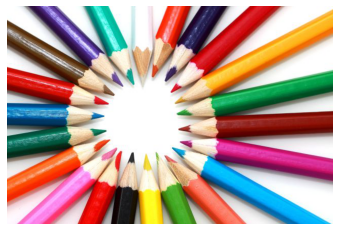

In [ ]:
kredki_org = plt.imread('pencils.jpg')
plt.imshow(kredki_org)
plt.axis('off')

In [ ]:
kredki_flat = kredki_org.reshape(-1,3)

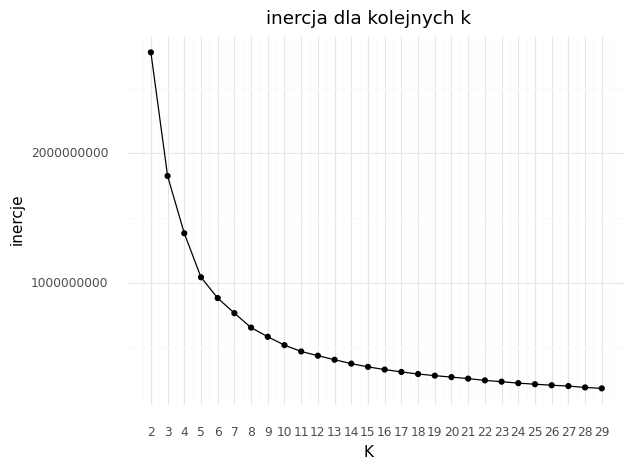

<ggplot: (8733372540769)>

In [ ]:
ks = range(2, 30)
inercje = []
for k in ks:
  km =KMeans (n_clusters=k).fit(kredki_flat)
  inercje.append(km.inertia_)

inercje_df = pd.DataFrame({'K': ks,
                           'inercja' : inercje})

(ggplot(inercje_df, aes(x= 'K', y = 'inercje')) +
 geom_point() +
 geom_line() + 
 scale_x_continuous (breaks = ks) +
 theme_minimal() +
 labs (title = 'Wykres osypiska'))

# **PREZENTACJA WYNIKÓW**



*   obraz oryginalny


In [ ]:
plt.imshow(kredki_org)
plt.axis('off')



*   dla k = 2


(-0.5, 639.5, 426.5, -0.5)

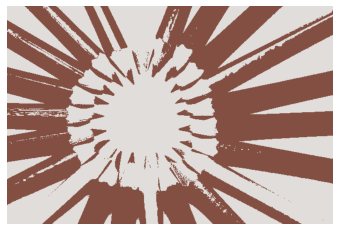

In [ ]:
km = KMeans(n_clusters=2, random_state=0).fit(kredki_flat)
kredki_flat2 = kredki_flat.copy()
for i in np.unique(km.labels_):
  kredki_flat2[km.labels_ == i, :] = km.cluster_centers_[i]
kredki2 = kredki_flat2.reshape(kredki_org.shape)
plt.imshow(kredki2)
plt.axis('off')



*   dla k = 3

(-0.5, 639.5, 426.5, -0.5)

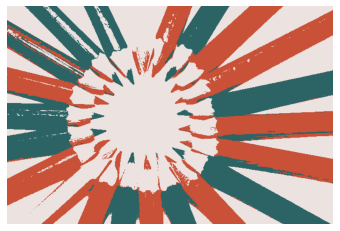

In [ ]:
km = KMeans(n_clusters=3, random_state=0).fit(kredki_flat)
kredki_flat3 = kredki_flat.copy()
for i in np.unique(km.labels_):
  kredki_flat3[km.labels_ == i, :] = km.cluster_centers_[i]
kredki3 = kredki_flat3.reshape(kredki_org.shape)
plt.imshow(kredki3)
plt.axis('off')



*   dla k = 10

(-0.5, 639.5, 426.5, -0.5)

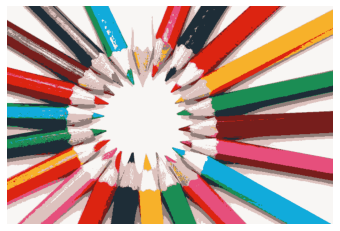

In [ ]:
km = KMeans(n_clusters=10, random_state=0).fit(kredki_flat)
kredki_flat10 = kredki_flat.copy()
for i in np.unique(km.labels_):
  kredki_flat10[km.labels_ == i, :] = km.cluster_centers_[i]
kredki10 = kredki_flat10.reshape(kredki_org.shape)
plt.imshow(kredki10)
plt.axis('off')



*   dla k = 25

(-0.5, 639.5, 426.5, -0.5)

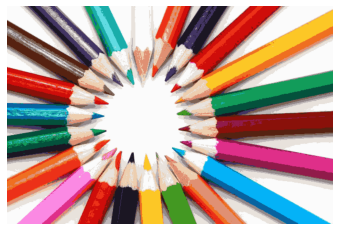

In [ ]:
km = KMeans(n_clusters=25, random_state=0).fit(kredki_flat)
kredki_flat10 = kredki_flat.copy()
for i in np.unique(km.labels_):
  kredki_flat10[km.labels_ == i, :] = km.cluster_centers_[i]
kredki10 = kredki_flat10.reshape(kredki_org.shape)
plt.imshow(kredki10)
plt.axis('off')



*   dla k = 100

(-0.5, 639.5, 426.5, -0.5)

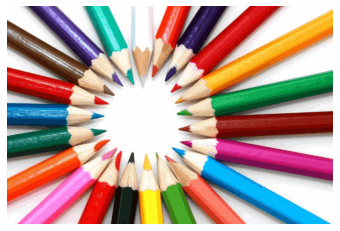

In [ ]:
km = KMeans(n_clusters=100, random_state=0).fit(kredki_flat)
kredki_flat10 = kredki_flat.copy()
for i in np.unique(km.labels_):
  kredki_flat10[km.labels_ == i, :] = km.cluster_centers_[i]
kredki10 = kredki_flat10.reshape(kredki_org.shape)
plt.imshow(kredki10)
plt.axis('off')

## **WNIOSKI:**

W celu odzworowania obrazka 'pencils.jpg' zastosowano wykres osypiska, który pozwolił wyciągnąć następujące wznioski:



*   przy wykorzystaniu 2 klastrów otrzymujemy ilość oraz położenie elementów na obrazie
*   przy wykorzystaniu 3 klastrów otrzymujemy wyniki, które pozwolą pogrupować elemnty na obrazie na podstawie subiektrywnej temperatury barw (biel, kolory ciepłe, kolory zimne)
*   przy wykorzystaniu 10 klastrów otrzymujemy już zadowalające wyniki pozwalające dość dobrze odwzorować wszystkie elementy z zadowalającą dokładnością
*   przy wykorzystaniu 25 klastrów otrzymujemy dobrze odwzorowany obraz piertwotny
*   przy wykorzystaniu 100 klastrów otrzymujemy obraz bardzo dobrze przypominający obraz pierwotny


*Moim zdaniem optymalnym rozwiązaniem jest zastosowanie 10 klastrów, ponieważ możemy dość dokładnie określić występujące kolory kredek na wykresie, natomiast rozwiązanie to nie odwzoruje 1:1 obrazu pierwotnego*



